In [12]:
import pandas as pd
import numpy as np
# show max columns and rows
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
import matplotlib.pyplot as plt
import seaborn as sns
from utils.exploration import *

In [13]:
df_raw = pd.read_csv('Data/cleaned_data.csv')

In [14]:
df = df_raw.copy()

In [15]:
display(df.head(3), df.shape)

,Patient ID,Year of diagnosis,Radiation recode,Survival months,Age,Marital Status,Sex_is_male,Race,Chemotherapy,Surgery,T,N,M,Grouped Stage,Tumor Size
0,840290,2004,0,8,70-74 years,Married,0,White,1,0,T2,N0,M1,IV,25
1,9040147,2004,1,19,75-79 years,Married,0,Other,1,0,T1,N0,M0,I,30
2,16143672,2004,0,22,80-84 years,Married,1,White,1,0,T1,N0,M0,I,20


(1044, 15)

Mean of Survival months: 13.36
Median of Survival months: 9.00
Standard deviation of Survival months: 16.10
Mode of Survival months: 0
Number of outliers in Survival months: 68
Number of extreme outliers in Survival months: 22


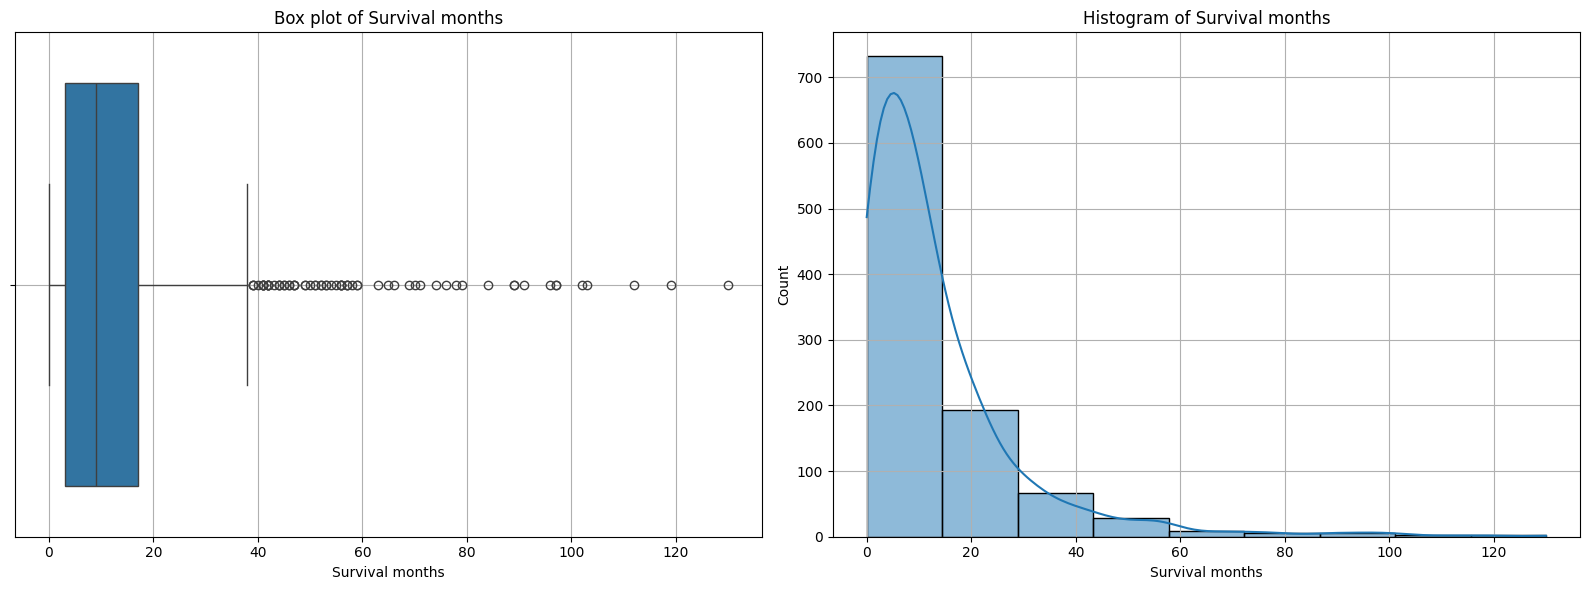

In [16]:
# check Survival Months distribution
data_exploration(df, 'Survival months')

Mean of Tumor Size: 47.41
Median of Tumor Size: 40.00
Standard deviation of Tumor Size: 29.60
Mode of Tumor Size: 40
Number of outliers in Tumor Size: 36
Number of extreme outliers in Tumor Size: 1


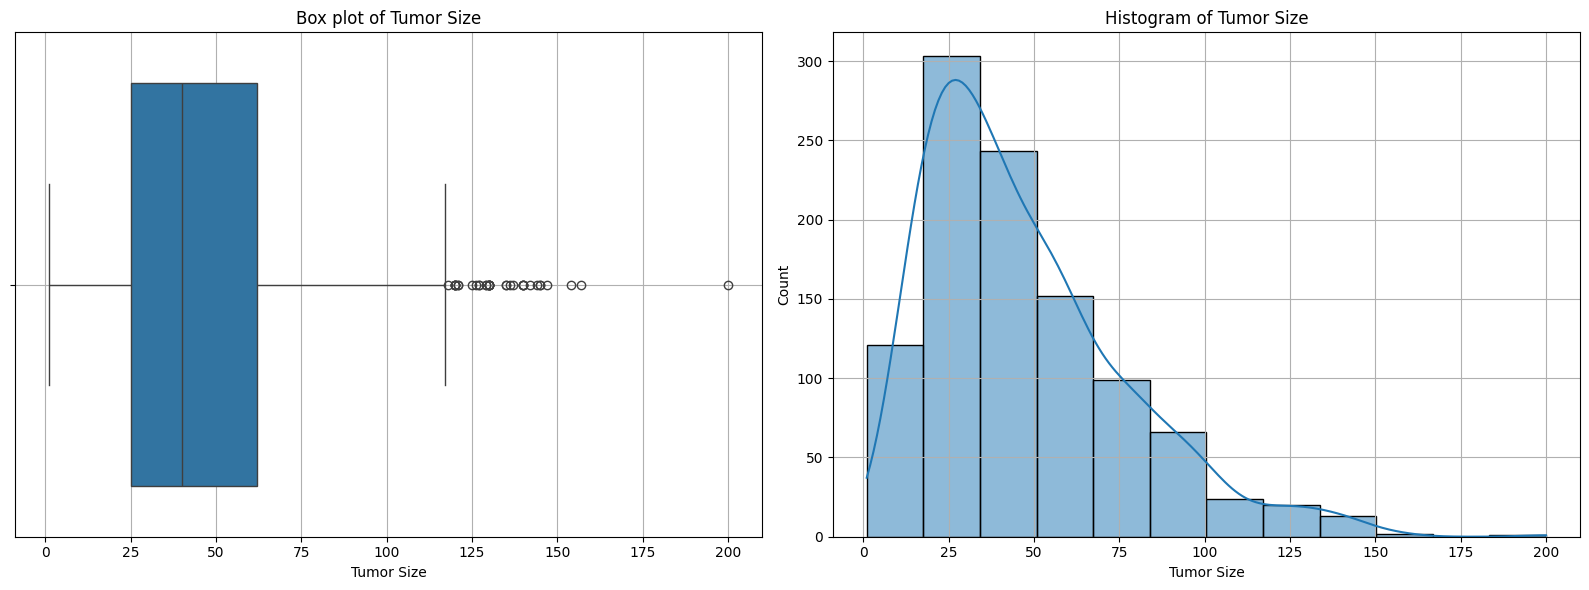

In [17]:
# check Tumor Size distribution
data_exploration(df, 'Tumor Size')

Counts and percentages of unique values in Survival Group:
                Count  Percentage
Survival Group                   
1                 530   50.766284
0                 514   49.233716


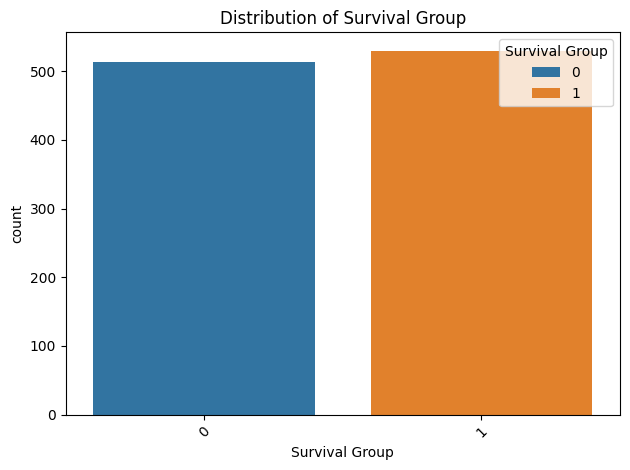

In [18]:
# make them two groups
df['Survival Group'] = df['Survival months'].apply(lambda x: 0 if x < 9 else 1)

data_exploration(df, 'Survival Group')

In [19]:
# drop not useful columns
df = df.drop(['Patient ID','Year of diagnosis','Survival months'], axis=1)

In [20]:
# a loop to convert all object columns to category
for col in df.columns:
    if df[col].dtype == 'object':
        df[col] = df[col].astype('category')

In [21]:
# one hot encoding for all category columns
df = pd.get_dummies(df, drop_first=True)

# make the true and false to 1 and 0 for all columns
for col in df.columns:
    if df[col].dtype == 'bool':
        df[col] = df[col].astype('int64')

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1044 entries, 0 to 1043
Data columns (total 30 columns):
 #   Column                                 Non-Null Count  Dtype
---  ------                                 --------------  -----
 0   Radiation recode                       1044 non-null   int64
 1   Sex_is_male                            1044 non-null   int64
 2   Chemotherapy                           1044 non-null   int64
 3   Surgery                                1044 non-null   int64
 4   Tumor Size                             1044 non-null   int64
 5   Survival Group                         1044 non-null   int64
 6   Age_35-49 years                        1044 non-null   int64
 7   Age_50-54 years                        1044 non-null   int64
 8   Age_55-59 years                        1044 non-null   int64
 9   Age_60-64 years                        1044 non-null   int64
 10  Age_65-69 years                        1044 non-null   int64
 11  Age_70-74 years               

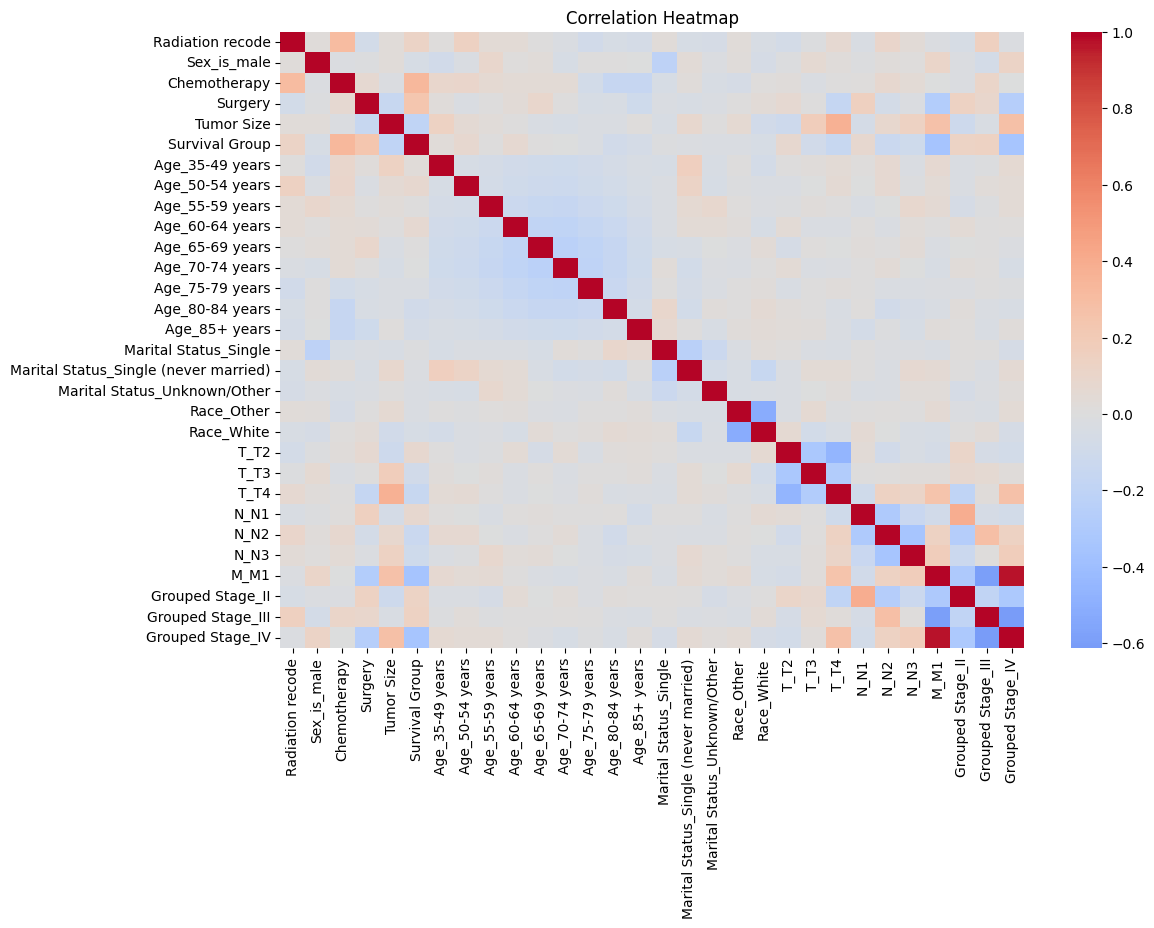

In [22]:
# check the heatmap for correlation
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=False, cmap='coolwarm', center=0)
plt.title('Correlation Heatmap')
plt.show()

## Data Splitting

In [23]:
X = df.drop('Survival Group', axis=1)
y = df['Survival Group']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, 
                                                    random_state=66, stratify=y)

from sklearn.preprocessing import MinMaxScaler
# Fit the scaler to the "Tumor Size" column in the training data
scaler = MinMaxScaler()
scaler.fit(X_train[["Tumor Size"]])
X_train["Tumor Size"] = scaler.transform(X_train[["Tumor Size"]])
X_test["Tumor Size"] = scaler.transform(X_test[["Tumor Size"]])

In [24]:
# check shape
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((730, 29), (314, 29), (730,), (314,))

In [26]:
X_train.head(3)

,Radiation recode,Sex_is_male,Chemotherapy,Surgery,Tumor Size,Age_35-49 years,Age_50-54 years,Age_55-59 years,Age_60-64 years,Age_65-69 years,Age_70-74 years,Age_75-79 years,Age_80-84 years,Age_85+ years,Marital Status_Single,Marital Status_Single (never married),Marital Status_Unknown/Other,Race_Other,Race_White,T_T2,T_T3,T_T4,N_N1,N_N2,N_N3,M_M1,Grouped Stage_II,Grouped Stage_III,Grouped Stage_IV
959,1,1,1,0,0.126263,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0
65,0,1,0,0,0.267677,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1
502,0,1,0,0,0.318182,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,1,0


In [ ]:
# save the train and test data
X_train.to_csv('Data/X_train.csv', index=False)
X_test.to_csv('Data/X_test.csv', index=False)
y_train.to_csv('Data/y_train.csv', index=False)
y_test.to_csv('Data/y_test.csv', index=False)